## House Price using Linear Regression Model

In [1]:
# Importing the libraries
import pandas as pd # For storing the data in the form of dataframe
import numpy as np # Data Manipulation
from sklearn import linear_model # sklearn for linear regression
import matplotlib.pyplot as plt # Visualizing the result
import seaborn as sns # Visualizating the result

In [2]:
%matplotlib inline

In [3]:
# Load data from an excel sheet
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

# Data (Train + Test)
data = pd.concat((train, test)).reset_index(drop=True)
data.drop(['SalePrice'], axis=1, inplace=True)

### Overview of Train dataset

In [4]:
print("Train set size:", train.shape)

Train set size: (1460, 81)


In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
train.count()
train = pd.DataFrame(train)
print(train)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Overview of Test Dataset

In [10]:
print("Test set size:", test.shape)

Test set size: (1459, 80)


In [11]:
test.count()
test = pd.DataFrame(test)
print(test)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities  ... ScreenPorch PoolAre

In [12]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [14]:
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


### Checking null value in the dataset

In [15]:
print(train.isnull().any()) 
print(train.dtypes)

#find missing values in the dataset
pd.isnull(train).sum()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

<AxesSubplot:>

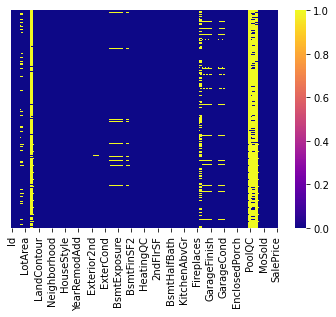

In [16]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=True, cmap='plasma')

<AxesSubplot:>

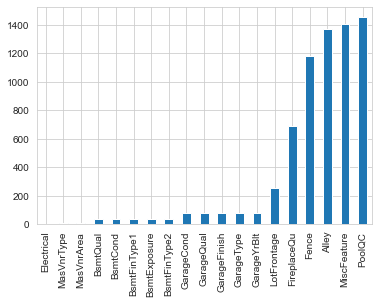

In [17]:
sns.set_style("whitegrid")
missing = train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

Among 79 variable, 19 attributes have missing values, 5 over 50% of all data. Most of times NA means lack of subject described by attribute, like missing pool, fence, no garage and basement.

<AxesSubplot:>

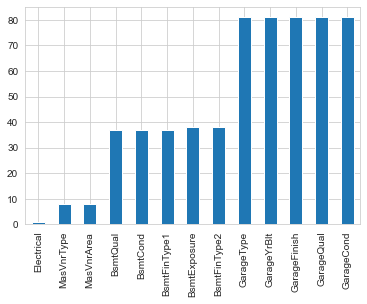

In [18]:
#remove some columns with significant missing values:
train.drop(columns=['FireplaceQu', 'Alley', 'MiscFeature', 'PoolQC', "Fence", 'LotFrontage'], inplace=True)

sns.set_style("whitegrid")
missing = train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

<AxesSubplot:>

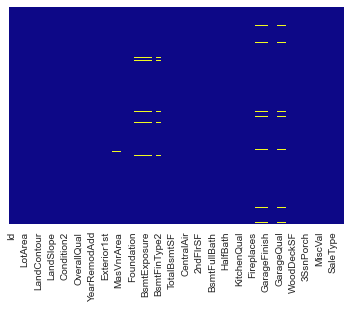

In [19]:
#check the missing values again
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='plasma')

#### Test Missing Value

In [20]:
print(test.isnull().any()) 
print(test.dtypes)

Id               False
MSSubClass       False
MSZoning          True
LotFrontage       True
LotArea          False
                 ...  
MiscVal          False
MoSold           False
YrSold           False
SaleType          True
SaleCondition    False
Length: 80, dtype: bool
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 80, dtype: object


In [21]:
pd.isnull(test).sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

<AxesSubplot:>

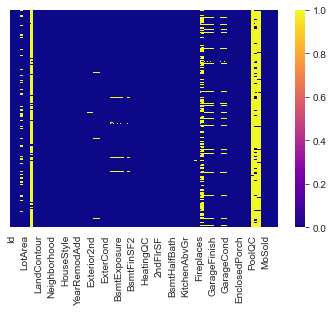

In [22]:
sns.heatmap(test.isnull(), yticklabels=False, cbar=True, cmap='plasma')

<AxesSubplot:>

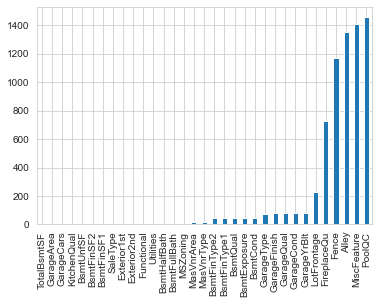

In [23]:
sns.set_style("whitegrid")
missing = test.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

<AxesSubplot:>

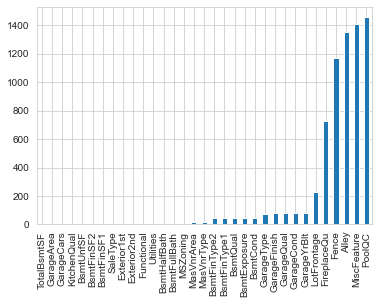

In [24]:
sns.set_style("whitegrid")
missing = test.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

<AxesSubplot:>

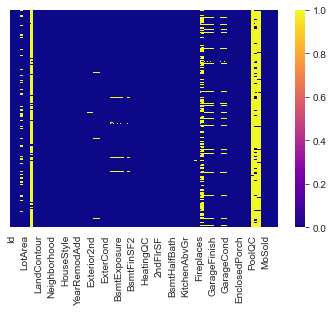

In [25]:
sns.heatmap(test.isnull(), yticklabels=False, cbar=True, cmap='plasma')

### Fill out Missing Value

Checking on NaN values in the dataset: if a value is NaN, the house might not have that certain attribute, which will affect the price of the house. So, we will try to fill in the null cell with a new category called "None".

In [26]:
training_null = pd.isnull(train).sum()
testing_null = pd.isnull(test).sum()

null = pd.concat([training_null, testing_null], axis=1, keys=["Training", "Testing"])
null

,Training,Testing
Id,0.0,0.0
MSSubClass,0.0,0.0
MSZoning,0.0,4.0
LotArea,0.0,0.0
Street,0.0,0.0
...,...,...
Alley,NaN,1352.0
FireplaceQu,NaN,730.0
PoolQC,NaN,1456.0
Fence,NaN,1169.0


In [27]:
#Based on the description data file provided, all the variables who have meaningfull NaN

meaning_null = ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "GarageType", "GarageFinish", "GarageQual", "GarageCond"]

In [28]:
#Replacing every Nan value with "None"

for i in meaning_null:
    train[i].fillna("None", inplace=True)
    test[i].fillna("None", inplace=True)
    data[i].fillna("None", inplace=True)

Fill in missing values in the dataset with mean function, MasVnrType is categorical so the missing values will be replaced with "None"

In [29]:
train["GarageYrBlt"].fillna(train["GarageYrBlt"].mean(), inplace=True)
test["GarageYrBlt"].fillna(test["GarageYrBlt"].mean(), inplace=True)
data["GarageYrBlt"].fillna(data["GarageYrBlt"].mean(), inplace=True)

train["MasVnrArea"].fillna(train["MasVnrArea"].mean(), inplace=True)
test["MasVnrArea"].fillna(test["MasVnrArea"].mean(), inplace=True)
data["MasVnrArea"].fillna(data["MasVnrArea"].mean(), inplace=True)

train["MasVnrType"].fillna("None", inplace=True)
test["MasVnrType"].fillna("None", inplace=True)
data["MasVnrType"].fillna("None", inplace=True)

<AxesSubplot:>

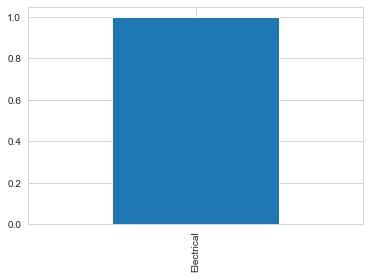

In [30]:
sns.set_style("whitegrid")
missing = train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

<AxesSubplot:>

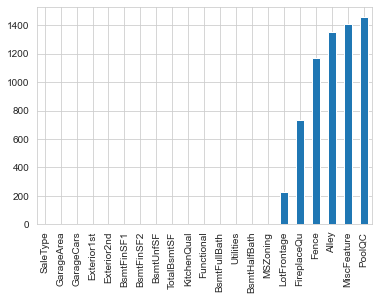

In [31]:
sns.set_style("whitegrid")
missing = test.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [32]:
#Checking on the null values left
train_null_2 = pd.isnull(train).sum()
test_null_2 = pd.isnull(test).sum()

null_2 = pd.concat([train_null_2, test_null_2], axis=1, keys=["Training", "Testing"])
null_2

,Training,Testing
Id,0.0,0.0
MSSubClass,0.0,0.0
MSZoning,0.0,4.0
LotArea,0.0,0.0
Street,0.0,0.0
...,...,...
Alley,NaN,1352.0
FireplaceQu,NaN,730.0
PoolQC,NaN,1456.0
Fence,NaN,1169.0


In [33]:
null_values_2 = null_2[(null_2.sum(axis=1) > 0)]
null_values_2

,Training,Testing
MSZoning,0.0,4.0
Utilities,0.0,2.0
Exterior1st,0.0,1.0
Exterior2nd,0.0,1.0
BsmtFinSF1,0.0,1.0
BsmtFinSF2,0.0,1.0
BsmtUnfSF,0.0,1.0
TotalBsmtSF,0.0,1.0
Electrical,1.0,0.0
BsmtFullBath,0.0,2.0


Dropping Null Values from the train dataset because there is only one null value left, deleting it will not affect the result.

In [34]:
train = train.dropna()
print(train.isnull().sum())

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64


For the null values in the test dataset, we will fill out with the mean of the values for the numerical values and for categorical values we will fill it with the most common term that appear in the dataset.

In [35]:
#Define the data category of the null values in the test dataset:
types_test = test.dtypes
num_test = types_test[(types_test == int) | (types_test == float)]
cat_test = types_test[types_test == object]

Fill in numerical values:

In [36]:
numerical_values_test = list(num_test.index)

print(numerical_values_test)

['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea']


In [37]:
for i in numerical_values_test:
    test[i].fillna(test[i].mean(), inplace=True)

In [38]:
categorical_values_test = list(cat_test.index)

In [39]:
fill_cat = []

for i in categorical_values_test:
    if i in list(null.index):
        fill_cat.append(i)
print(fill_cat)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [40]:
def most_common_term(lst):
    lst = list(lst)
    return max(set(lst), key=lst.count)
#most_common_term finds the most common term in a series

most_common = []

for i in fill_cat:
    most_common.append(most_common_term(data[i]))
    
most_common

['RL',
 'Pave',
 nan,
 'Reg',
 'Lvl',
 'AllPub',
 'Inside',
 'Gtl',
 'NAmes',
 'Norm',
 'Norm',
 '1Fam',
 '1Story',
 'Gable',
 'CompShg',
 'VinylSd',
 'VinylSd',
 'None',
 'TA',
 'TA',
 'PConc',
 'TA',
 'TA',
 'No',
 'Unf',
 'Unf',
 'GasA',
 'Ex',
 'Y',
 'SBrkr',
 'TA',
 'Typ',
 nan,
 'Attchd',
 'Unf',
 'TA',
 'TA',
 'Y',
 nan,
 nan,
 nan,
 'WD',
 'Normal']

In [41]:
most_common_dictionary = {fill_cat[0]: [most_common[0]], fill_cat[1]: [most_common[1]], fill_cat[2]: [most_common[2]], fill_cat[3]: [most_common[3]],
                          fill_cat[4]: [most_common[4]], fill_cat[5]: [most_common[5]], fill_cat[6]: [most_common[6]], fill_cat[7]: [most_common[7]],
                          fill_cat[8]: [most_common[8]]}
most_common_dictionary

{'MSZoning': ['RL'],
 'Street': ['Pave'],
 'Alley': [nan],
 'LotShape': ['Reg'],
 'LandContour': ['Lvl'],
 'Utilities': ['AllPub'],
 'LotConfig': ['Inside'],
 'LandSlope': ['Gtl'],
 'Neighborhood': ['NAmes']}

In [42]:
k = 0
for i in fill_cat:  
    test[i].fillna(most_common[k], inplace=True)
    k += 1

In [43]:
#Final check for missing values in the dataset
training_null_3 = pd.isnull(train).sum()
testing_null_3 = pd.isnull(test).sum()

null_3 = pd.concat([training_null_3, testing_null_3], axis=1, keys=["Training", "Testing"])
null_3[null_3.sum(axis=1) > 0]

,Training,Testing
Alley,NaN,1352.0
FireplaceQu,NaN,730.0
PoolQC,NaN,1456.0
Fence,NaN,1169.0
MiscFeature,NaN,1408.0


### Manipulating and processing data

In [44]:
# Some of the non-numeric predictors are stored as numbers; convert them into strings 
train['MSSubClass'] = train['MSSubClass'].apply(str)
train['YrSold'] = train['YrSold'].astype(str)
train['MoSold'] = train['MoSold'].astype(str)

test['MSSubClass'] = test['MSSubClass'].apply(str)
test['YrSold'] = test['YrSold'].astype(str)
test['MoSold'] = test['MoSold'].astype(str)

print(train.shape)
print(test.shape)

(1459, 75)
(1459, 80)


In [45]:
y_train = train["SalePrice"].copy()
x_train = train.copy().drop(columns = ["Id", "SalePrice"])
x_test = test.copy().drop(columns = ["Id"])

print(x_train.shape)
print(x_test.shape)

(1459, 73)
(1459, 79)


In [46]:
num_cols = x_train.select_dtypes(include=['number'])
cat_cols = x_train.select_dtypes(include=['object'])

print(f'The dataset contains {len(num_cols.columns.tolist())} numerical columns \
and {len(cat_cols.columns.tolist())} categorical columns')

The dataset contains 32 numerical columns and 41 categorical columns


In [47]:
#Merge two dataset into one set of data
df = pd.concat([train, test])

In [48]:
#Handling Categorical Data With Dummy Variables
categorical_cols = df.select_dtypes(include=np.object).columns
df = pd.get_dummies(df, prefix=categorical_cols)
df

<ipython-input-48-31c0be99bff0>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_cols = df.select_dtypes(include=np.object).columns


,Id,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,FireplaceQu_TA,PoolQC_Ex,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed
0,1,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,0,0,0,0,0,0,0,0,0,0
1,2,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,0,0,0,0,0,0,0,0,0,0
2,3,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,0,0,0,0,0,0,0,0,0,0
3,4,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,0,0,0,0,0,0,0,0,0,0
4,5,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,1936,4,7,1970,1970,0.0,0.0,0.0,546.0,...,0,0,0,0,0,0,0,0,0,0
1455,2916,1894,4,5,1970,1970,0.0,252.0,0.0,294.0,...,0,0,0,0,0,0,0,0,0,0
1456,2917,20000,5,7,1960,1996,0.0,1224.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
1457,2918,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,...,0,0,0,0,0,1,0,0,0,1


In [49]:
df = df.drop(columns = ["Id"])
print(df.shape)

(2918, 326)


### Linear Regression Model

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold

In [51]:
#Seperate Train data and Test data for Modeling
categorical_cols = train.select_dtypes(include=np.object).columns
train = pd.get_dummies(train, prefix=categorical_cols)
train

<ipython-input-51-d9f2f1eb737f>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_cols = train.select_dtypes(include=np.object).columns


,Id,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,8450,7,5,2003,2003,196.0,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,2,9600,6,8,1976,1976,0.0,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,3,11250,7,5,2001,2002,162.0,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,4,9550,7,5,1915,1970,0.0,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,5,14260,8,5,2000,2000,350.0,655,0,490,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,7917,6,5,1999,2000,0.0,0,0,953,...,0,0,0,1,0,0,0,0,1,0
1456,1457,13175,6,6,1978,1988,119.0,790,163,589,...,0,0,0,1,0,0,0,0,1,0
1457,1458,9042,7,9,1941,2006,0.0,275,0,877,...,0,0,0,1,0,0,0,0,1,0
1458,1459,9717,5,6,1950,1996,0.0,49,1029,0,...,0,0,0,1,0,0,0,0,1,0


In [52]:
print(train.shape)

(1459, 309)


In [53]:
y = train['SalePrice']
x = train.drop('SalePrice', axis = 1)

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [55]:
# Treating LinearRegression as an object
lr = LinearRegression()

In [56]:
# Fitting here meaning training the train data on test data
lr.fit(X_train, y_train)

LinearRegression()

In [57]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.78


In [58]:
# print the intercept
print(lr.intercept_)

-1242851.1191716702


In [59]:
print(lr.coef_)

[ 1.55958740e+00  8.89538181e-01  6.68584291e+03  6.36450405e+03
  3.76500034e+02  9.29826079e+01  2.93189401e+01  1.56576648e+01
  9.35092926e+00  6.42979304e-02  2.50728392e+01  1.74223942e+01
  3.78696837e+01 -2.03550558e+01  3.49370708e+01  2.57706240e+03
 -1.20891938e+03  5.31272808e+03  1.10337115e+03 -4.24181660e+03
 -7.29949106e+03  1.02034814e+03  1.19907484e+03  1.94384959e+01
  1.95362093e+03  2.31015767e+01  1.05834029e+01  7.10475884e+00
 -5.92585212e+00 -3.19024444e+00  1.60179884e+01  1.38398593e+02
  6.31860201e-01  2.23089905e+03  1.38079051e+04 -7.34765438e+03
  1.04775236e+02  7.73746408e+02  1.67290324e+03 -2.10932922e+03
  1.28039324e+04 -6.02606589e+03  1.04203397e+04  1.12471966e+04
 -1.17062938e+04 -4.75674478e+03 -1.72954892e+04 -3.82012045e+03
 -2.29614442e+04  1.03400028e+04  1.30676535e+03  5.61620063e+03
  5.69847544e+03 -1.68209750e+04  1.68209750e+04 -1.64691880e+03
  6.95153617e+03 -4.41747380e+03 -8.87143565e+02  7.23631771e+03
  3.48471353e+03 -1.25013

In [60]:
pd.DataFrame(lr.coef_, x.columns, columns = ['Coeff'])

,Coeff
Id,1.559587
LotArea,0.889538
OverallQual,6685.842915
OverallCond,6364.504054
YearBuilt,376.500034
...,...
SaleCondition_AdjLand,11225.663778
SaleCondition_Alloca,6660.227307
SaleCondition_Family,11213.659658
SaleCondition_Normal,4503.694449


In [61]:
# Predicting the test values
predictions_1 = lr.predict(X_test) 
print(predictions_1.shape)
predictions_1

(438,)


array([172116.51587985,  84932.40347475, 101190.8347376 , 140526.4445745 ,
       148946.78593361,  94884.19946114, 161146.69821038, 174581.52880132,
        86104.58344669, 108031.30084275, 106030.50321821, 337836.99014129,
        92928.79705807, 215349.83770703, 331867.9916846 , 120846.25248663,
       177946.32397683, 406977.64055302, 281332.07753761, 178652.28441023,
       294474.60735324,  67773.17946649, 145471.10293171, 211758.72791556,
       183570.9946938 , 186863.20728039, 159604.07733027, 296407.4847148 ,
        47424.13972872, 361760.24110189, 123729.35866118, 153175.21744471,
       160602.31285034, 174835.5794177 , 235251.75019058, 304328.156934  ,
       153525.0797118 , 191724.80926001, 109592.65339665, 106550.82149379,
        88876.12271076, 138796.9819092 , 224578.42895812,  73330.4165172 ,
       128961.111681  , 208207.17807682, 194489.12023424, 205806.17448861,
        94576.81860285, 290699.32128337, 309969.13353999, 156057.14005161,
        75787.46751846,  

In [62]:
predictions_2 = lr.predict(X_train)
print(predictions_2.shape)

(1021,)


In [63]:
predictions = np.concatenate((predictions_1, predictions_2))
print(predictions.shape)

(1459,)


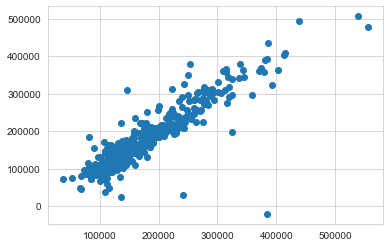

In [64]:
# Compare the values of the predictions array with the values of y_test.
plt.scatter(y_test, predictions_1)

In [65]:
# Metrics help in determining the error rate between y_test and predictions
from sklearn import metrics

print("MAE", metrics.mean_absolute_error(y_test,predictions_1))  # Mean Absolute error
print("MSE", metrics.mean_squared_error(y_test,predictions_1)) # Mean Square error
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test,predictions_1))) # Root Mean Square error

MAE 20136.987449242573
MSE 1239603500.1164587
RMSE 35208.00335316473


In [66]:
res=pd.DataFrame(columns = ['Id', 'SalePrice'])
res['Id'] = test['Id']
res['SalePrice'] = predictions
res.to_csv('submission.csv',index=False)